In [24]:
import pandas as pd
import seaborn as sns

In [2]:
%matplotlib notebook

In [25]:
data = pd.read_hdf("/mnt/raw/clean/labelled.h5")

In [27]:
data = data.loc[pd.Timestamp('2016-03-01 00:00:00'):pd.Timestamp('2016-03-03 00:00:00')]

In [29]:
data = data[data.INVALID==False]

In [31]:
data = data[data.POST_SPEW==False]

In [39]:
data.columns

Index(['JIC22564', 'JIC22864', '3312JI354.PV', '3312FI040.PV', '3312FIC040.PV',
       'DI22936-PCT.CPV', 'FI22937.PV', 'T1_Output', 'PI22925.PV',
       'SI22313.PV',
       ...
       'SY23015.MV', 'WI21633A.PV', 'SY21633A.MV', 'WIC22026.SV',
       'WIC22026LAG.RV', 'YIC22001', 'SPEW_EVENT', 'PRE_SPEW', 'POST_SPEW',
       'INVALID'],
      dtype='object', length=123)

In [35]:
columns = {
    "3311WI671.PV" : "Spewput",
    "3311HS181A.PV" : "Throughput",
    
    "CalcCY03FRC1.CPV" : "T1_Size",
    "CY02FRC1.CPV" : "T2_Size",
    "3313AI531.PV" : "T3_Size",

    "MIY22937.CPV" : "T1_Output",
    "MIY22953.CPV" : "T2_Output",
    "3312FY078.CPV" : "T3_Output",

    "3311WIC151.PV" : "1Speed",
    "SIC22371.MV" : "MillSpeed",
}
data.rename(columns=columns, inplace=True)

In [43]:
cols = ['MillSpeed', '1Speed', 'T3_Output', 'T2_Output', 'T1_Output', 'T3_Size', 'T2_Size', 'T1_Size', 'Spewput', 'T12_T3_Ratio', 'T1_T2_Ratio']

<IPython.core.display.Javascript object>


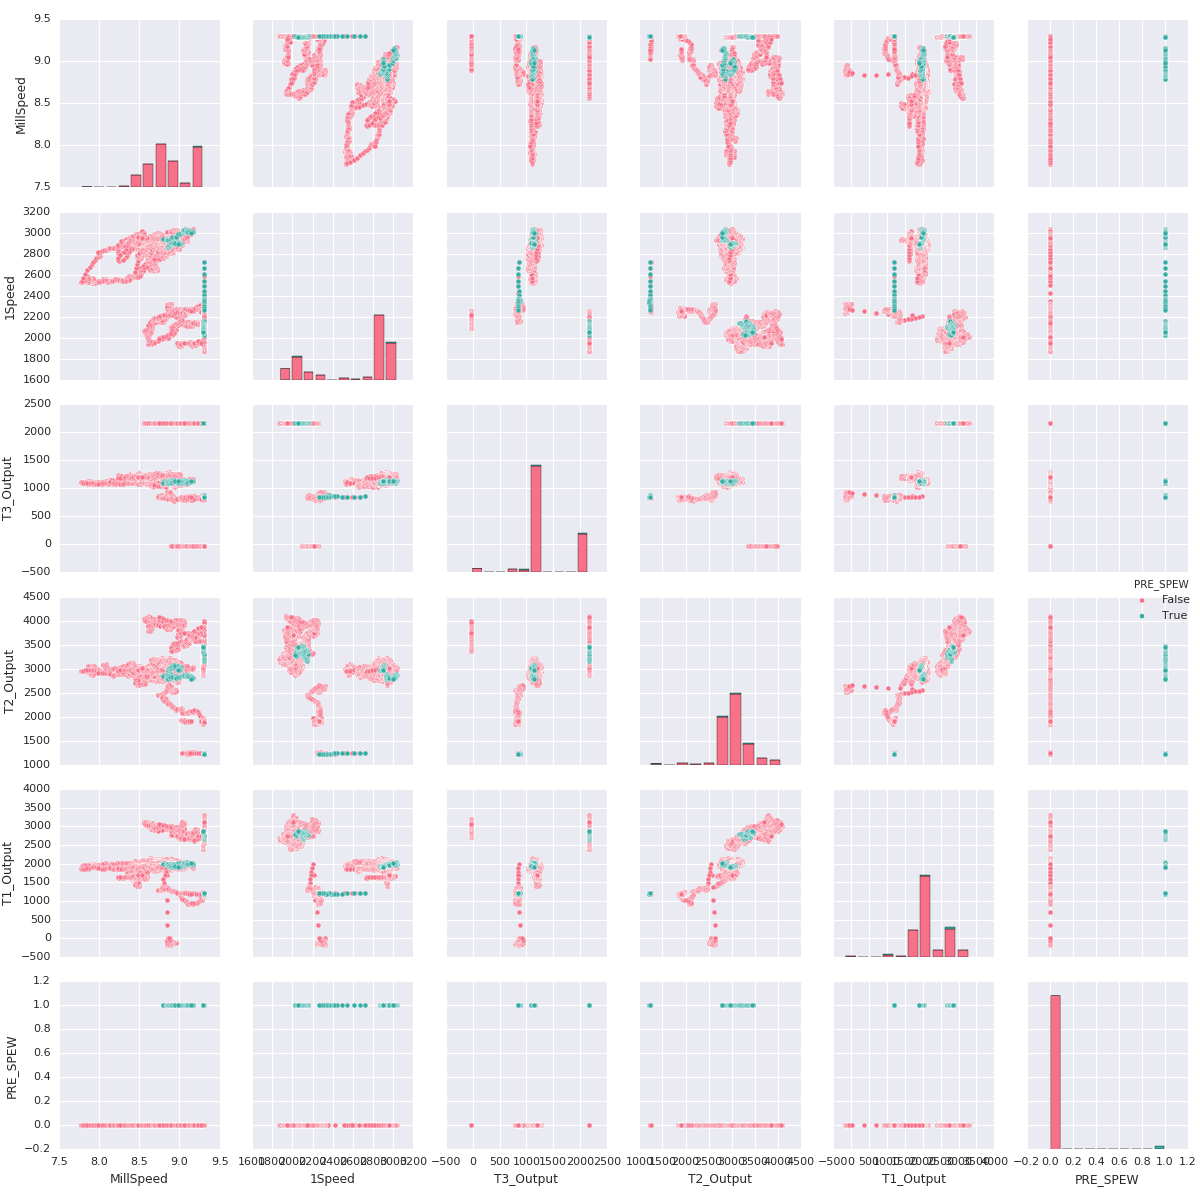

In [44]:
sns.pairplot(data[cols[:5] + ["PRE_SPEW"]], hue="PRE_SPEW", palette="husl")